In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))\

import numpy as np
import pandas as pd
import GPy
try:
    from google.colab import files
    uploaded = files.upload()
except ImportError:
    pass
    
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale, normalize
    
%matplotlib inline

In [2]:
df=pd.read_csv('bitcoin_start-240418.csv')

In [3]:
df=df[:-2]
df["Dataindex"] = df.index                        ## Keep index, could be usefull
df.index=df.Date    
df.index=df.index.to_datetime()
df=df.drop(columns=['Date'])

 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning:to_datetime is deprecated. Use pd.to_datetime(...)


In [4]:
#Normalize full data
submean = df['Close Price'] - np.mean(df['Close Price'])
normalized = submean #/ np.sqrt(np.var(df['Close Price']))
df['Close Price Normalized'] = normalized

In [5]:
#take log scale
df['Close Price Log']=np.log(df['Close Price'])

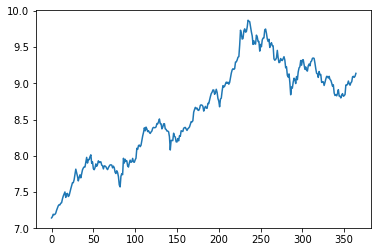

In [6]:
plt.plot(range(365),df['Close Price Log'][-365:])

### Data of one year, normalized, not log

In [7]:
## PREPROCESSING

df["Weekday"] = df.index.weekday                 ## 0 = Monday, 6 = Sunday

Y = np.array(df["Close Price"][-365:]).reshape(-1, 1)

X = np.array(df["Dataindex"][-365:]).reshape(-1, 1)


submean = Y- np.mean(Y)
Y = submean #/ np.sqrt(np.var(Y)))

X=np.array(range(len(Y))).reshape(-1,1)

train_per=0.8
split_ind=int(len(X)*train_per)
X_train=X[:split_ind]
Y_train=Y[:split_ind]
X_test=X[split_ind:]
Y_test=Y[split_ind:]

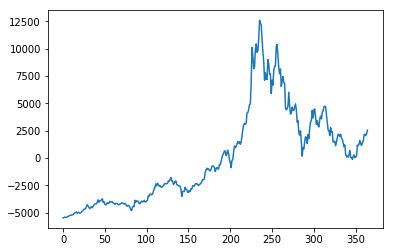

In [8]:
plt.plot(X,Y)

 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/GPy/kern/src/stationary.py:167: RuntimeWarning:overflow encountered in true_divide
 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/GPy/kern/src/rbf.py:43: RuntimeWarning:overflow encountered in square
 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/GPy/kern/src/rbf.py:46: RuntimeWarning:invalid value encountered in multiply


GP_regression.,value,constraints,priors
sum.rbf.variance,315845.236485307,+ve,
sum.rbf.lengthscale,16.846970017111982,+ve,
sum.linear.variances,1961.6615023237862,+ve,
Gaussian_noise.variance,253872.77564956795,+ve,


(array([[3586.32478306]]), array([[857384.13293453]]))
statistics of the model
marginal log likelihood: -2664.0977935235933
mlppd: -10.67308092206368
test error: 3476354.5733254873


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


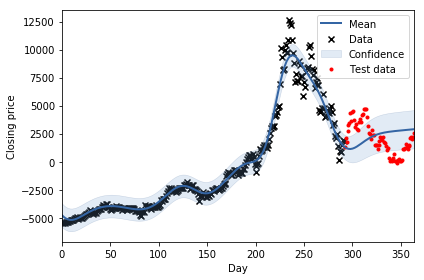

In [9]:
RBF = GPy.kern.RBF(input_dim=1)
RBF2 = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1,period=7)
LIN = GPy.kern.Linear(1)
RQ=GPy.kern.RatQuad(1)
RQ2=GPy.kern.RatQuad(input_dim=1, variance=3)

KERNEL = RBF + LIN
m = GPy.models.GPRegression(X_train, Y_train, KERNEL)
m.optimize()
display(m)

m.plot()
plt.scatter(X_test,Y_test,c='r',marker='.',label='Test data')
plt.legend()
plt.xlim(0,)
plt.xlabel('Day')
plt.ylabel('Closing price')

print(m.predict(np.array([450]).reshape(-1, 1)))

print("statistics of the model")
mll=m.log_likelihood()
print("marginal log likelihood:",mll)
mlppd=np.mean(m.log_predictive_density(X_test,Y_test))
print("mlppd:",mlppd)
mean,sigma=m.predict(X_test)
test_err=np.mean((mean-Y_test)**2)
print("test error:",test_err)

### All data, normalized, not log

In [10]:
## PREPROCESSING

df["Weekday"] = df.index.weekday                 ## 0 = Monday, 6 = Sunday

Y = np.array(df["Close Price Normalized"]).reshape(-1, 1)

X = np.array(df["Dataindex"]).reshape(-1, 1)

train_per=0.8
split_ind=int(len(X)*train_per)
X_train=X[:split_ind]
Y_train=Y[:split_ind]
X_test=X[split_ind:]
Y_test=Y[split_ind:]

GP_regression.,value,constraints,priors
sum.rbf.variance,187951.63239025587,+ve,
sum.rbf.lengthscale,19.16903463886205,+ve,
sum.linear.variances,6297.030801473544,+ve,
Gaussian_noise.variance,312.92409738982957,+ve,


(array([[-1108.66260961]]), array([[336.37776813]]))
statistics of the model
marginal log likelihood: -10347.003697192904
mlppd: -113.48224132087304
test error: 43634728.18043188


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


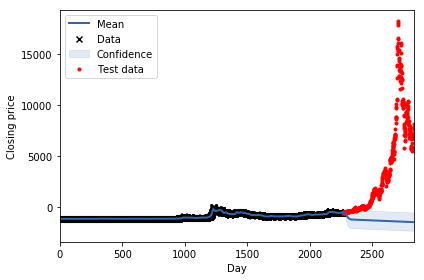

In [11]:
RBF = GPy.kern.RBF(input_dim=1)
RBF2 = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1,period=7)
LIN = GPy.kern.Linear(1)
RQ=GPy.kern.RatQuad(1)
RQ2=GPy.kern.RatQuad(input_dim=1, variance=3)

KERNEL = RBF + LIN
m = GPy.models.GPRegression(X_train, Y_train, KERNEL)
m.optimize()
display(m)

m.plot()
plt.scatter(X_test,Y_test,c='r',marker='.',label='Test data')
plt.legend()
plt.xlim(0,)
plt.xlabel('Day')
plt.ylabel('Closing price')

print(m.predict(np.array([450]).reshape(-1, 1)))

print("statistics of the model")
mll=m.log_likelihood()
print("marginal log likelihood:",mll)
mlppd=np.mean(m.log_predictive_density(X_test,Y_test))
print("mlppd:",mlppd)
mean,sigma=m.predict(X_test)
test_err=np.mean((mean-Y_test)**2)
print("test error:",test_err)

### One year, normalized log

In [12]:
## PREPROCESSING

df["Weekday"] = df.index.weekday                 ## 0 = Monday, 6 = Sunday

Y = np.array(df["Close Price Log"][-365:]).reshape(-1, 1)

X = np.array(df["Dataindex"][-365:]).reshape(-1, 1)


submean = Y- np.mean(Y)
Y = submean #/ np.sqrt(np.var(Y)))

X=np.array(range(len(Y))).reshape(-1,1)

train_per=0.8
split_ind=int(len(X)*train_per)
X_train=X[:split_ind]
Y_train=Y[:split_ind]
X_test=X[split_ind:]
Y_test=Y[split_ind:]

GP_regression.,value,constraints,priors
sum.rbf.variance,0.26218257455774663,+ve,
sum.rbf.lengthscale,5.333822271431671,+ve,
sum.linear.variances,1.622448639758506e-06,+ve,
Gaussian_noise.variance,0.001518994261249244,+ve,


(array([[0.51369932]]), array([[0.32834699]]))
statistics of the model
marginal log likelihood: 348.77664495625527
mlppd: -0.2989818623150915
test error: 0.03570552666550173


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


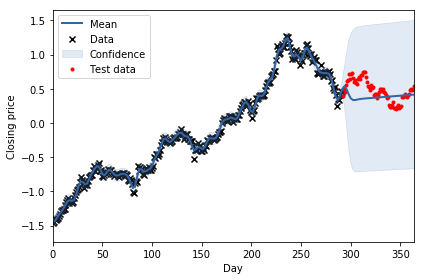

In [13]:
RBF = GPy.kern.RBF(input_dim=1)
RBF2 = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1,period=7)
LIN = GPy.kern.Linear(1)
RQ=GPy.kern.RatQuad(1)
RQ2=GPy.kern.RatQuad(input_dim=1, variance=3)

KERNEL = RBF + LIN
m = GPy.models.GPRegression(X_train, Y_train, KERNEL)
m.optimize()
display(m)

m.plot()
plt.scatter(X_test,Y_test,c='r',marker='.',label='Test data')
plt.legend()
plt.xlim(0,)
plt.xlabel('Day')
plt.ylabel('Closing price')

print(m.predict(np.array([450]).reshape(-1, 1)))

print("statistics of the model")
mll=m.log_likelihood()
print("marginal log likelihood:",mll)
mlppd=np.mean(m.log_predictive_density(X_test,Y_test))
print("mlppd:",mlppd)
mean,sigma=m.predict(X_test)
test_err=np.mean((mean-Y_test)**2)
print("test error:",test_err)

GP_regression.,value,constraints,priors
sum.rbf.variance,0.2934124756802685,+ve,
sum.rbf.lengthscale,8.85022768852837,+ve,
sum.linear.variances,1.9990616947460313e-06,+ve,
sum.periodic_Matern52.variance,4.198178132625973e-15,+ve,
sum.periodic_Matern52.lengthscale,68.7507501207022,+ve,
sum.periodic_Matern52.period,6.761235296184331,+ve,
Gaussian_noise.variance,0.0023971231569282748,+ve,


(array([[0.54701745]]), array([[0.40138169]]))
statistics of the model
marginal log likelihood: 350.5968168986544
mlppd: -0.3326026097825642
test error: 0.020847568371957552


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


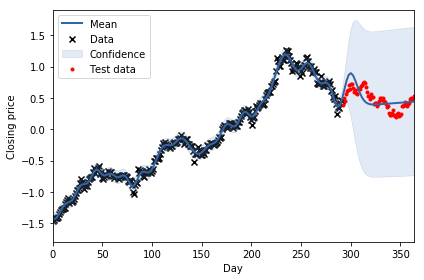

In [14]:
RBF = GPy.kern.RBF(input_dim=1)
RBF2 = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1,period=7)
LIN = GPy.kern.Linear(1)
RQ=GPy.kern.RatQuad(1)
RQ2=GPy.kern.RatQuad(input_dim=1, variance=3)
RBF_PER = RBF+LIN+PERIODIC
m = GPy.models.GPRegression(X_train, Y_train, RBF_PER)
m.optimize()
display(m)

m.plot()
plt.scatter(X_test,Y_test,c='r',marker='.',label='Test data')
plt.legend()
plt.xlim(0,)
plt.xlabel('Day')
plt.ylabel('Closing price')

print(m.predict(np.array([450]).reshape(-1, 1)))

print("statistics of the model")
mll=m.log_likelihood()
print("marginal log likelihood:",mll)
mlppd=np.mean(m.log_predictive_density(X_test,Y_test))
print("mlppd:",mlppd)
mean,sigma=m.predict(X_test)
test_err=np.mean((mean-Y_test)**2)
print("test error:",test_err)

GP_regression.,value,constraints,priors
sum.rbf.variance,0.29369606165384027,+ve,
sum.rbf.lengthscale,9.24712545611409,+ve,
sum.linear.variances,1.921040958264507e-06,+ve,
sum.mul.periodic_Matern52.variance,13.997620039580429,+ve,
sum.mul.periodic_Matern52.lengthscale,17.765059458990304,+ve,
sum.mul.periodic_Matern52.period,5.557483260132165,+ve,
sum.mul.rbf.variance,13.997620039580479,+ve,
sum.mul.rbf.lengthscale,1.1811184200205291,+ve,
Gaussian_noise.variance,2.1580314331697006e-13,+ve,


(array([[0.53378081]]), array([[0.4036049]]))
statistics of the model
marginal log likelihood: 381.96413005997675
mlppd: -0.29511315488950957
test error: 0.018068226215138136


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


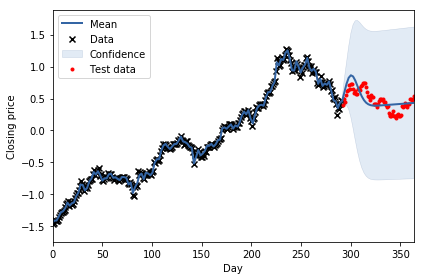

In [15]:
RBF = GPy.kern.RBF(input_dim=1)
RBF2 = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1,period=7)
LIN = GPy.kern.Linear(1)
RQ=GPy.kern.RatQuad(1)
RQ2=GPy.kern.RatQuad(input_dim=1, variance=3)
RBF_PER = RBF+LIN+PERIODIC*RBF2
m = GPy.models.GPRegression(X_train, Y_train, RBF_PER)
m.optimize()
display(m)

m.plot()
plt.scatter(X_test,Y_test,c='r',marker='.',label='Test data')
plt.legend()
plt.xlim(0,)
plt.xlabel('Day')
plt.ylabel('Closing price')

print(m.predict(np.array([450]).reshape(-1, 1)))

print("statistics of the model")
mll=m.log_likelihood()
print("marginal log likelihood:",mll)
mlppd=np.mean(m.log_predictive_density(X_test,Y_test))
print("mlppd:",mlppd)
mean,sigma=m.predict(X_test)
test_err=np.mean((mean-Y_test)**2)
print("test error:",test_err)

GP_regression.,value,constraints,priors
sum.rbf.variance,0.30023539176737946,+ve,
sum.rbf.lengthscale,10.13046371670542,+ve,
sum.linear.variances,1.9654879252974617e-06,+ve,
sum.mul.periodic_Matern52.variance,5.273243059175344,+ve,
sum.mul.periodic_Matern52.lengthscale,15.267223082180628,+ve,
sum.mul.periodic_Matern52.period,7.0,fixed +ve,
sum.mul.rbf.variance,5.2732430591751385,+ve,
sum.mul.rbf.lengthscale,1.0629155016840994,+ve,
Gaussian_noise.variance,1.1921909536228386e-09,+ve,


(array([[0.53040001]]), array([[0.41948075]]))
statistics of the model
marginal log likelihood: 389.2533242930248
mlppd: -0.27691743842098737
test error: 0.015961118638863105


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


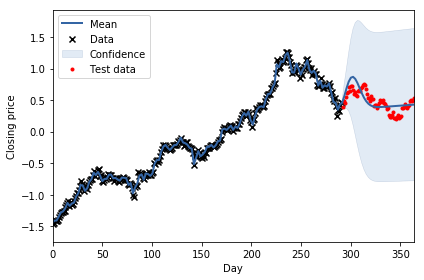

In [16]:
#fixed period
RBF = GPy.kern.RBF(input_dim=1)
RBF2 = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1,period=7)
PERIODIC.period.fix()
LIN = GPy.kern.Linear(1)

RBF_PER = RBF+LIN+PERIODIC*RBF2
m = GPy.models.GPRegression(X_train, Y_train, RBF_PER)
m.optimize()
display(m)

m.plot()
plt.scatter(X_test,Y_test,c='r',marker='.',label='Test data')
plt.legend()
plt.xlim(0,)
plt.xlabel('Day')
plt.ylabel('Closing price')

print(m.predict(np.array([450]).reshape(-1, 1)))

print("statistics of the model")
mll=m.log_likelihood()
print("marginal log likelihood:",mll)
mlppd=np.mean(m.log_predictive_density(X_test,Y_test))
print("mlppd:",mlppd)
mean,sigma=m.predict(X_test)
test_err=np.mean((mean-Y_test)**2)
print("test error:",test_err)

### All data, normalized, log

In [17]:
## PREPROCESSING
submean = df['Close Price Log'] - np.mean(df['Close Price Log'])
normalized = submean #/ np.sqrt(np.var(df['Close Price Log']))
df['Close Price Normalized Log'] = normalized

Y=np.array(df['Close Price Normalized Log']).reshape(-1,1)

X=np.array(range(len(Y))).reshape(-1,1)

train_per=0.8
split_ind=int(len(X)*train_per)
X_train=X[:split_ind]
Y_train=Y[:split_ind]
X_test=X[split_ind:]
Y_test=Y[split_ind:]

GP_regression.,value,constraints,priors
sum.rbf.variance,3.3770754965000416,+ve,
sum.rbf.lengthscale,11.391959344110848,+ve,
sum.linear.variances,1.0567035302249595e-07,+ve,
Gaussian_noise.variance,0.003135380673088208,+ve,


(array([[-3.1859836]]), array([[0.00353205]]))
statistics of the model
marginal log likelihood: 2311.380079978171
mlppd: -2.601617286648153
test error: 7.7086054420591585


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


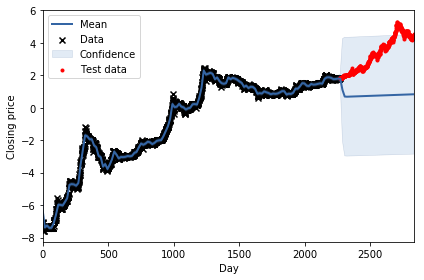

In [18]:
RBF = GPy.kern.RBF(input_dim=1)
RBF2 = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1,period=7)
LIN = GPy.kern.Linear(1)
RQ=GPy.kern.RatQuad(1)
RQ2=GPy.kern.RatQuad(input_dim=1, variance=3)

KERNEL = RBF + LIN
m = GPy.models.GPRegression(X_train, Y_train, KERNEL)
m.optimize()
display(m)

m.plot()
plt.scatter(X_test,Y_test,c='r',marker='.',label='Test data')
plt.legend()
plt.xlim(0,)
plt.xlabel('Day')
plt.ylabel('Closing price')

print(m.predict(np.array([450]).reshape(-1, 1)))
print("statistics of the model")
mll=m.log_likelihood()
print("marginal log likelihood:",mll)
mlppd=np.mean(m.log_predictive_density(X_test,Y_test))
print("mlppd:",mlppd)
mean,sigma=m.predict(X_test)
test_err=np.mean((mean-Y_test)**2)
print("test error:",test_err)

GP_regression.,value,constraints,priors
sum.rbf.variance,3.37736763908107,+ve,
sum.rbf.lengthscale,11.391973459600495,+ve,
sum.linear.variances,1.0560441603898065e-07,+ve,
sum.periodic_Matern52.variance,3.681264354622206e-07,+ve,
sum.periodic_Matern52.lengthscale,16.097164772489148,+ve,
sum.periodic_Matern52.period,6.180335357789497,+ve,
Gaussian_noise.variance,0.003135420838280911,+ve,


(array([[-3.18598332]]), array([[0.0035321]]))
statistics of the model
marginal log likelihood: 2311.380075857199
mlppd: -2.6016429443591815
test error: 7.709126815518391


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


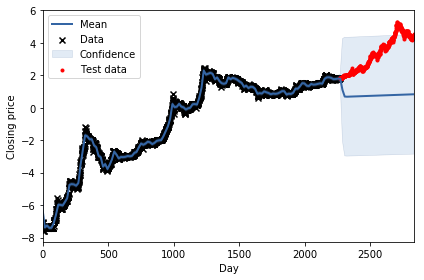

In [19]:
RBF = GPy.kern.RBF(input_dim=1)
RBF2 = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1,period=7)
LIN = GPy.kern.Linear(1)
RQ=GPy.kern.RatQuad(1)
RQ2=GPy.kern.RatQuad(input_dim=1, variance=3)

KERNEL = RBF+LIN+PERIODIC
m = GPy.models.GPRegression(X_train, Y_train, KERNEL)
m.optimize()
display(m)

m.plot()
plt.scatter(X_test,Y_test,c='r',marker='.',label='Test data')
plt.legend()
plt.xlim(0,)
plt.xlabel('Day')
plt.ylabel('Closing price')

print(m.predict(np.array([450]).reshape(-1, 1)))
print("statistics of the model")
mll=m.log_likelihood()
print("marginal log likelihood:",mll)
mlppd=np.mean(m.log_predictive_density(X_test,Y_test))
print("mlppd:",mlppd)
mean,sigma=m.predict(X_test)
test_err=np.mean((mean-Y_test)**2)
print("test error:",test_err)

GP_regression.,value,constraints,priors
sum.rbf.variance,3.399640148958232,+ve,
sum.rbf.lengthscale,12.291078336769537,+ve,
sum.linear.variances,1.0375457749600192e-07,+ve,
sum.mul.periodic_Matern52.variance,0.3931577790152593,+ve,
sum.mul.periodic_Matern52.lengthscale,4.7022903783474455,+ve,
sum.mul.periodic_Matern52.period,7.0,fixed +ve,
sum.mul.rbf.variance,0.39315777901235105,+ve,
sum.mul.rbf.lengthscale,2.172499143529019,+ve,
Gaussian_noise.variance,0.0008324452024192542,+ve,


(array([[-3.21227942]]), array([[0.00130903]]))
statistics of the model
marginal log likelihood: 2648.1018408692853
mlppd: -2.6042725929535675
test error: 7.778027855856005


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


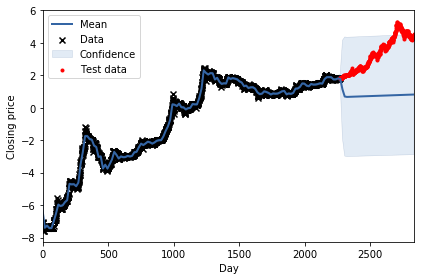

In [20]:
RBF = GPy.kern.RBF(input_dim=1)
RBF2 = GPy.kern.RBF(input_dim=1)
PERIODIC = GPy.kern.PeriodicMatern52(input_dim=1,period=7)
PERIODIC.period.fix()
LIN = GPy.kern.Linear(1)

RBF_PER = RBF+LIN+PERIODIC*RBF2
m = GPy.models.GPRegression(X_train, Y_train, RBF_PER)
m.optimize()
display(m)

m.plot()
plt.scatter(X_test,Y_test,c='r',marker='.',label='Test data')
plt.legend()
plt.xlim(0,)
plt.xlabel('Day')
plt.ylabel('Closing price')

print(m.predict(np.array([450]).reshape(-1, 1)))

print("statistics of the model")
mll=m.log_likelihood()
print("marginal log likelihood:",mll)
mlppd=np.mean(m.log_predictive_density(X_test,Y_test))
print("mlppd:",mlppd)
mean,sigma=m.predict(X_test)
test_err=np.mean((mean-Y_test)**2)
print("test error:",test_err)